# Satellite tile analysis


In this first notebook, we illustrate the use of **RADWave** to extract wave conditions based on altimeter data for a specific geographical region. 

We will be querying data already downloaded from the obtained from Australian Ocean Data Network portal [AODN](https://portal.aodn.org.au/). 

> We recomend to look at **RADWave** [documentation](https://radwave.readthedocs.io/en/latest/usage.html#getting-altimeter-values-from-data-providers) and the embeded video that explain how to select both a spatial bounding box and a temporal extent from the portal and how to export the file containing the `List of URLs`. This `TXT` file contains a list of `NETCDF` files for each available satellites. 

In [1]:
from IPython.display import IFrame
IFrame(src='https://bit.ly/2ROFoLY', width=900, height=600)

## Loading RADWave library and initialisation

We first start by importing **RADwave** library into our working space.

In [1]:
import RADWave as rwave

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Once the list of `NETCDF` data file has been saved on disk, you will be able to load it by initialising **RADWave** main Python class called `waveAnalysis`.

For a detail overview of the options available in this class, you can have a look at the [waveAnalysis API](https://radwave.readthedocs.io/en/latest/RADWave.html#RADWave.altiwave.waveAnalysis).

Here, we will use the following parameters:

+ `altimeterURL` (str): list of NetCDF URLs downloaded from the wave data portal containing the radar altimeter data ['../dataset/IMOSURLs.txt']
+ `bbox` (list): bounding box specifying the geographical extent of the uploaded dataset following the convention [lon min,lon max,lat min,lat max]  [here we use a region located offshore sydney]
+ `stime` (list):  starting time of wave climate analysis following the convention [year, month, day] [we chose the 1st of January 1985]
+ `etime` (list): ending time of wave climate analysis following the convention [year, month, day] [we chose the 31st of December 2018]

For this example, we don't specify a list of particular satellites to use (`satNames` keyword) so all of them will be queried. In other words we will look at all the records from the 10 altimeters: 

JASON-2 - JASON-3 - SARAL - SENTINEL-3A - CRYOSAT-2 - ENVISAT - GEOSAT - ERS-2 - GFO - TOPEX.

In [2]:
wa = rwave.waveAnalysis(altimeterURL='../pracenv/dataset/IMOSURLs.txt', bbox=[152.0,155.0,-36.0,-34.0], 
                  stime=[1985,1,1], etime=[2018,12,31])

## Processing altimeters data

After class initialisation querying the actual dataset is realised by calling the `processAltimeterData` function. The description of this function is available from the [API](https://radwave.readthedocs.io/en/latest/RADWave.html#RADWave.altiwave.waveAnalysis.processAltimeterData).

The function can take some times to execute depending on the number of NETCDF files to load and the size of the dataset to query (here it should not take more than **30 s**).

> **RADWave** uses the uploaded file containing the list of URLs to query via `THREDDS` the remote data. This operation can take *several minutes* and when looking at a large region it is recommended to divide the analyse in smaller regions and download a series of URLs text file instead of the entire domain directly.

In [3]:
wa.processAltimeterData(max_qc=1, altimeter_pick='all', saveCSV = 'altimeterData.csv')

Processing Altimeter Dataset 

   +  name JASON-2     / number of tracks                               6   
   +  name JASON-3     / number of tracks                               4   
   +  name SARAL       / number of tracks                               6   
   +  name SENTINEL-3A / number of tracks                               6   
   +  name CRYOSAT-2   / number of tracks                               6   
   +  name ENVISAT     / number of tracks                               6   
   +  name GEOSAT      / number of tracks                               6   
   +  name ERS-2       / number of tracks                               6   
   +  name GFO         / number of tracks                               6   
   +  name TOPEX       / number of tracks                               6   
 
Processing altimeter dataset took:  8 s


In case where the `processAltimeterData` function has already been executed, one can load directly the processed data from the created `CSV` file in a more efficient way by running the `readAltimeterData` function as follow:

In [4]:
wa.readAltimeterData(saveCSV = 'altimeterData.csv')

Reading Processed Altimeter Dataset 



Once the dataset has been queried, we can plot the altimeter data points on a map using the `visualiseData` function.

This function **plots** and **saves** in a figure the geographical coordinates of processed altimeter data.

In [5]:
wa.visualiseData(title="Altimeter data tracks", extent=[149.,158.,-38.,-32.], 
                 addcity=['Sydney', 151.2093, -33.8688], markersize=40, zoom=8,
                 fsize=(8, 7), fsave=None)

/Users/getafix/anaconda3/envs/coast/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/getafix/anaconda3/envs/coast/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


## Computing wave regime for specified location


To perform wave analysis and compute the wave parameters discussed in the [documentation](https://radwave.readthedocs.io/en/latest/method.html#), we run the `generateTimeSeries` function.

This function computes time series of wave characteristics from available altimeter data namely the significant wave height and the wind speed.

It computes both **instantaneous** and **monthly** wave variables:

+ significant wave height (m) - wh & wh_rolling
+ wave period (s)  - period & period_rolling
+ wave energy flux (kW/m)  - power & power_rolling
+ wave average energy density (J/m2)  - energy & energy_rolling
+ wave group velocity (m/s)  - speed & speed_rolling

In [6]:
timeseries = wa.generateTimeSeries()

The class `waveAnalysis` stores a Pandas dataframe (called `timeseries`) of computed wave parameters that can be subsequently used to perform additional analysis.

To visualise this dataframe, one can do:

In [7]:
display(wa.timeseries)

date      wh  wh_rolling    period  \
0     1985-04-13 08:22:39.835939  3.3380    3.338000  6.820216   
1     1985-04-16 08:31:20.722658  3.2370    3.287500  7.593262   
2     1985-04-16 08:31:30.031252  3.2520    3.275667  8.068064   
3     1985-04-16 08:31:38.363283  3.1695    3.249125  8.171444   
4     1985-04-22 08:48:59.253906  2.2560    3.050500  7.566001   
...                          ...     ...         ...       ...   
13594 2018-12-29 07:19:51.140629  2.9610    2.257066  6.217100   
13595 2018-12-29 07:20:08.464846  2.8450    2.263982  6.698641   
13596 2018-12-29 22:55:26.296871  3.4490    2.282417  6.597829   
13597 2018-12-29 22:55:36.484374  3.3310    2.294753  6.288747   
13598 2018-12-29 22:55:50.749998  3.3900    2.307488  6.315870   

       period_rolling       power  power_rolling        energy  \
0            6.820216  149.027418     149.027418  13999.974159   
1            7.206739  156.030379     152.528898  13165.578585   
2            7.493847  167.326903     157.461566  13287.878634   
3            7.663247  160.981438     158.341534  12622.232117   
4            7.643798   75.516172     141.776462   6394.885322   
...               ...         ...            ...           ...   
13594        5.785322  106.895658      70.598167  11016.190276   
13595        5.796067  106.327768      71.018515  10169.958412   
13596        5.800757  153.915668      72.428915  14946.550471   
13597        5.806498  136.838655      73.186677  13941.318296   
13598        5.812421  142.340333      73.990789  14439.560584   

       energy_rolling      speed  speed_rolling        lat         lon  day  \
0        13999.974159  10.644835      10.644835 -34.356148  152.339462   13   
1        13582.776372  11.851388      11.248112 -34.494278  153.307892   16   
2        13484.477126  12.592447      11.696223 -35.012566  153.013702   16   
3        13268.915873  12.753801      11.960618 -35.475792  152.747742   16   
4        11894.109763  11.808839      11.930262 -35.719948  154.700333   22   
...               ...        ...            ...        ...         ...  ...   
13594     7335.068674   9.703505       9.029597 -34.503365  153.593140   29   
13595     7368.420317  10.455084       9.046367 -35.520107  153.293304   29   
13596     7501.722134  10.297738       9.053686 -34.364624  152.803726   29   
13597     7577.482089   9.815331       9.062647 -34.838604  153.085678   29   
13598     7657.273699   9.857664       9.071891 -35.500633  153.486710   29   

       month  year  
0          4  1985  
1          4  1985  
2          4  1985  
3          4  1985  
4          4  1985  
...      ...   ...  
13594     12  2018  
13595     12  2018  
13596     12  2018  
13597     12  2018  
13598     12  2018  

[13599 rows x 16 columns]

and to list the header names:

In [8]:
list(wa.timeseries)

['date',
 'wh',
 'wh_rolling',
 'period',
 'period_rolling',
 'power',
 'power_rolling',
 'energy',
 'energy_rolling',
 'speed',
 'speed_rolling',
 'lat',
 'lon',
 'day',
 'month',
 'year']

### Plotting time series

We can now plot time series of **RADWave** calculated wave parameters. This is done by calling the `plotTimeSeries` function. 

Amongst the available option one can choose to (complete list of options is available in the [API](https://radwave.readthedocs.io/en/latest/RADWave.html#RADWave.altiwave.waveAnalysis.plotTimeSeries) :
+ specify a specific temporal extent with the keyword `time` that provide the extent of years for the time series.
+ define the wave parameter to visualise using the keyword `series` that takes the following choices: 'H', 'T', 'P', 'E' and 'Cg'. 
            
In addition to the time series, the function provides additional information:  
 
+ Maximum parameter value
+ Mean parameter value
+ Median parameter value
+ 95th percentile parameter value

Max wave height: 9.015 m
Mean wave height: 2.386 m
Median wave height: 2.157 m
95th percentile wave height: 4.328 m


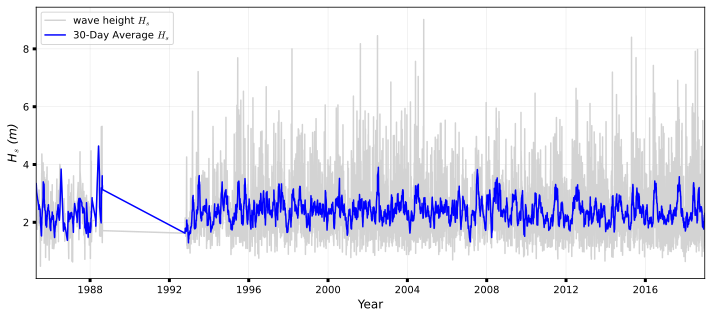

Figure saved:  seriesH
Max wave period: 12.169 s
Mean wave period: 6.328 s
Median wave period: 6.205 s
95th percentile wave period: 8.004 s


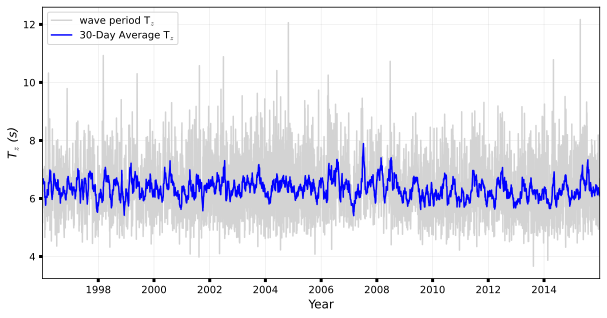

Max wave power: 1922.153 kW/m
Mean wave power: 89.942 kW/m
Median wave power: 58.435 kW/m
95th percentile wave power: 274.046 kW/m


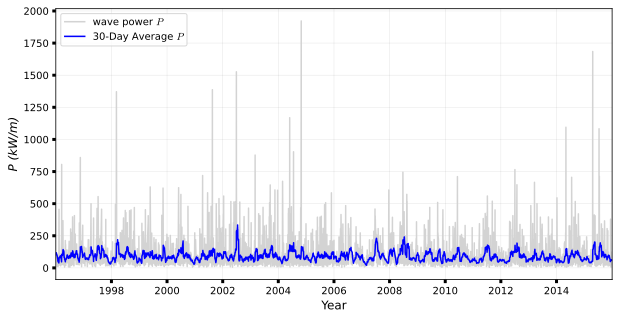

Max wave energy: 102114.179 J/m2
Mean wave energy: 8366.740 J/m2
Median wave energy: 6064.775 J/m2
95th percentile wave energy: 23373.495 J/m2


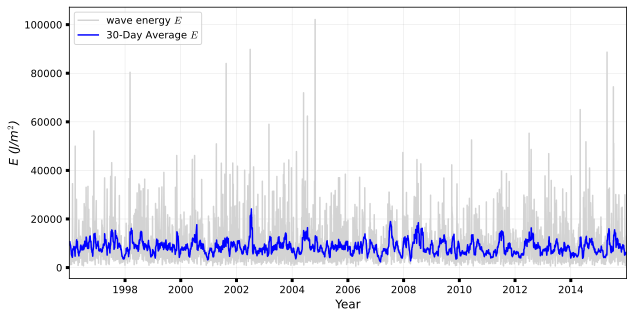

Max wave celerity: 18.993 m/s
Mean wave celerity: 9.876 m/s
Median wave celerity: 9.684 m/s
95th percentile wave celerity: 12.493 m/s


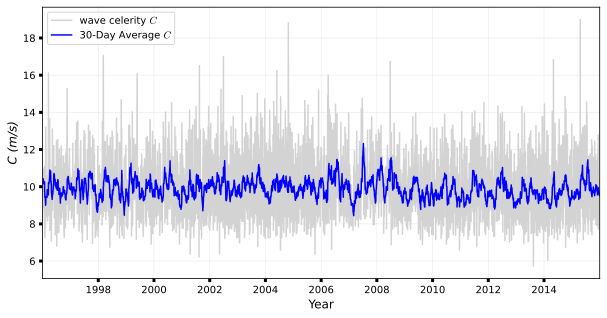

In [9]:
# Significant wave height
wa.plotTimeSeries(series='H', fsize=(12, 5), fsave='seriesH')

# Wave period
wa.plotTimeSeries(time=[1995,2016], series='T', fsize=(10, 5), fsave=None)

# Wave power
wa.plotTimeSeries(time=[1995,2016], series='P', fsize=(10, 5), fsave=None)

# Wave energy
wa.plotTimeSeries(time=[1995,2016], series='E', fsize=(10, 5), fsave=None)

# Wave group velocity
wa.plotTimeSeries(time=[1995,2016], series='Cg', fsize=(10, 5), fsave=None)

## Processing wave seasonability trends 

In addition to time series, one can analyse the seasonal characteristics of each parameter computed from the altimeter dataset. 

For a specified time interval and geographical extent, it computes the monthly seasonality of specific wave variables (the option in the `series` keyword are: wh, period, power, energy and speed). 

Obtained monthly averaged values are stored and returned with a `Pandas` dataframe. 

> User has the option to plot the computed wave paraneter characteristics as a heatmap, a box plot and a standard deviation graph.

For the wave height series, a **Seasonal Mann-Kendall** test is also performed to determine monotonic trends in computed dataset using the package from Hussain & Mahmud (2019).

Hussain & Mahmud, 2019: pyMannKendall: a python package for non parametric Mann Kendall family of trend tests - JOSS, 4(39), 1556.

A full explanation on the available options for the `computeSeasonalCharacteristics` function is provided in the [API](https://radwave.readthedocs.io/en/latest/RADWave.html#RADWave.altiwave.waveAnalysis.computeSeasonalCharacteristics).

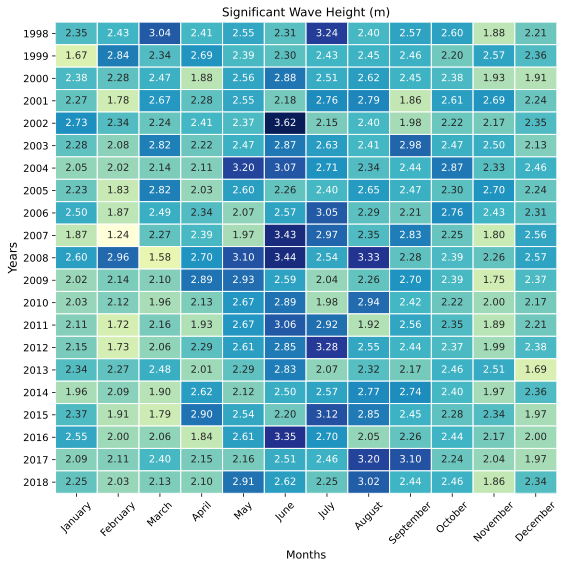

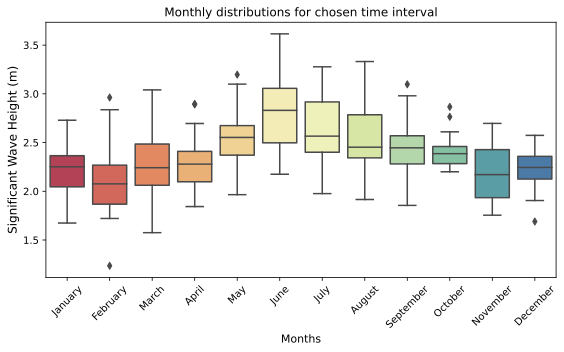

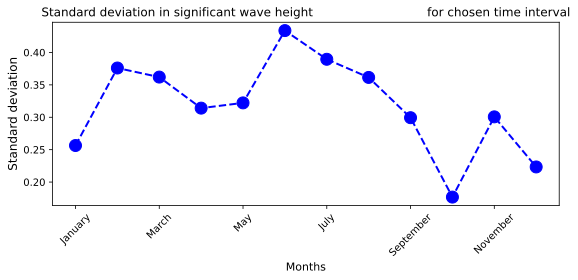

 
Change in yearly wave height trend accounting                       for seasonality:
    +           trend:  no trend
    +    slope (cm/y):  -0.6


In [10]:
wh_all = wa.computeSeasonalCharacteristics(series='wh', time=[1998,2018], lonlat=None, fsave=None, plot=True)

As mentionned above, the function `computeSeasonalCharacteristics` returns a **Pandas dataframe** containing the mean monthly values of specified wave series for the considered time interval.

These information can be displayed with: 

In [11]:
display(wh_all)

month   January  February     March     April       May      June      July  \
year                                                                          
1998   2.351125  2.425917  3.040265  2.409597  2.552500  2.309143  3.243607   
1999   1.673945  2.836879  2.342707  2.694594  2.391367  2.296109  2.429948   
2000   2.384111  2.284333  2.467391  1.879263  2.561735  2.883667  2.508028   
2001   2.265762  1.778638  2.665700  2.278663  2.549330  2.175027  2.757290   
2002   2.729128  2.344036  2.241866  2.408382  2.370490  3.615296  2.150962   
2003   2.282797  2.075855  2.820360  2.217680  2.466843  2.869926  2.628235   
2004   2.045579  2.016815  2.139200  2.110106  3.197121  3.071079  2.705356   
2005   2.228868  1.829830  2.821346  2.032036  2.603317  2.264040  2.400600   
2006   2.503040  1.867656  2.489400  2.342387  2.066156  2.565561  3.047338   
2007   1.865212  1.235417  2.269000  2.389500  1.965088  3.434308  2.970587   
2008   2.602917  2.962240  1.575316  2.695333  3.099453  3.435422  2.542619   
2009   2.024633  2.143294  2.104982  2.891375  2.928547  2.587742  2.036192   
2010   2.026906  2.123293  1.959370  2.131050  2.674776  2.891643  1.976136   
2011   2.107022  1.720822  2.155283  1.928560  2.674067  3.056233  2.916841   
2012   2.147952  1.732209  2.061818  2.289516  2.606216  2.853485  3.277294   
2013   2.340069  2.268353  2.484692  2.005859  2.285404  2.830435  2.070887   
2014   1.959031  2.089556  1.898509  2.624739  2.117915  2.497213  2.565698   
2015   2.365064  1.913398  1.791551  2.896398  2.542965  2.203991  3.116583   
2016   2.553333  1.998667  2.055542  1.842970  2.606470  3.348186  2.699881   
2017   2.091938  2.114136  2.398084  2.154494  2.163410  2.506615  2.456321   
2018   2.251136  2.029114  2.134832  2.097618  2.906651  2.616579  2.254411   

month    August  September   October  November  December      mean  
year                                                                
1998   2.404964   2.569500  2.597563  1.875065  2.213125  2.499364  
1999   2.452140   2.464948  2.200197  2.571683  2.358575  2.392758  
2000   2.616371   2.445692  2.381438  1.934292  1.905111  2.354286  
2001   2.785076   1.855100  2.610102  2.687730  2.235864  2.387024  
2002   2.399960   1.975706  2.222351  2.170740  2.353464  2.415198  
2003   2.411136   2.979702  2.474192  2.499652  2.125216  2.487633  
2004   2.342825   2.437700  2.866273  2.330634  2.457482  2.476681  
2005   2.645314   2.472810  2.297790  2.696471  2.244379  2.378067  
2006   2.291786   2.214572  2.764333  2.427338  2.311109  2.407556  
2007   2.352000   2.826820  2.247118  1.796981  2.562935  2.326247  
2008   3.331500   2.280691  2.385957  2.256074  2.573638  2.645097  
2009   2.263500   2.699016  2.394371  1.754304  2.372531  2.350041  
2010   2.939936   2.416032  2.218625  2.002133  2.168522  2.294035  
2011   1.915402   2.558229  2.353012  1.886556  2.211227  2.290271  
2012   2.545554   2.438050  2.374282  1.987544  2.384818  2.391562  
2013   2.315588   2.167511  2.456010  2.509348  1.689465  2.285302  
2014   2.765553   2.743315  2.400158  1.973824  2.358679  2.332849  
2015   2.854188   2.454073  2.283558  2.342958  1.966134  2.394238  
2016   2.051868   2.259214  2.440056  2.170773  1.999521  2.335540  
2017   3.199181   3.097683  2.238266  2.044035  1.966494  2.369222  
2018   3.016546   2.440930  2.459288  1.855523  2.339340  2.366831

Below we provide an example of how this function can be used to process seasonability for different geographical extents.

In [12]:
# First we create a dictionary of 1 by 1 degree tiles within our regional area of interest
tiles = []
tiles.append([152.0,153.0,-36.0,-35.0])
tiles.append([153.0,154.0,-36.0,-35.0])
tiles.append([152.0,153.0,-35.0,-34.0])
tiles.append([153.0,154.0,-35.0,-34.0])

# We also store the geographical locations of the center of each tile 
lonlat = []
lonlat.append([152.5,-35.5])
lonlat.append([153.5,-35.5])
lonlat.append([152.5,-34.5])
lonlat.append([153.5,-34.5])


# And we define a new dictionary that will be filled with regional wave seasonability
seasons = []

# Finally we loop over the defined tiles and perform seasonability analysis for significant wave height
for k in range(4):
    seasons.append(wa.computeSeasonalCharacteristics(series='wh', time=[1998,2018], 
                                        lonlat=tiles[k], plot=False))

This can then be used to plot the annual mean values of significant wave height for each tile over the temporal range of interest... 

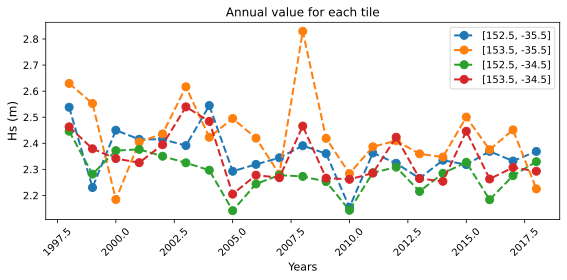

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.transforms import offset_copy
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['mathtext.fontset'] = 'cm'

fig, ax = plt.subplots(figsize = (8,4))

for k in range(4):
    yearwh = seasons[k]['mean']
    yearwh.plot(marker='o', linestyle='dashed', linewidth=2, markersize=8)
    
ax.set_title('Annual value for each tile',fontsize = 12)
ax.set_ylabel("Hs (m)",fontsize = 12)
ax.set_xlabel('Years',fontsize = 11)
ax.legend([lonlat[0],lonlat[1],lonlat[2],lonlat[3]])
ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10, rotation=45)
plt.tight_layout()
plt.show()